In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Duplicate key in file PosixPath('/usr/local/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'), line 263 ('font.family : sans-serif')


In [2]:
# サンプリング周波数
sampling_rate = 100

# グラフの範囲
fig_range = (0, 5)

# グラフの設定
fontsize_title = 25
fontsize_label = 20

# 平滑化の設定
window = 20

In [3]:
# 積分する関数
def integral(x):
    dx = np.array([])
    sum = 0
    for i in range(len(x)):
        sum += x[i]
        dx = np.append(dx, sum)
    return dx / sampling_rate

In [4]:
# 平滑化する関数
def smooth(x):
    dx = np.array([])
    for i in range(len(x[window:])):
        avg = sum(x[i-window:i+1]) / window
        dx = np.append(dx, avg)

    return dx


In [5]:
# CSVファイルを読み込む
csv_file_path = "./log/iphone-walk2.csv"
raw_data = pd.read_csv(csv_file_path)

# 時間、X軸、Y軸、Z軸のデータを取得
start_time = raw_data['time'][0]
relative_time = raw_data['time'] - start_time - 0.4

data = raw_data['z'].values
smooth_data = smooth(data)

# 積分したデータを格納するリスト
i_data = integral(data)
smooth_i_data = smooth(i_data)
i2_data = integral(i_data)
smooth_i2_data = smooth(i2_data)


/var/folders/4c/xmh8lsq95tdf8y24n_q2rf000000gn/T/ipykernel_53023/451722931.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=1)


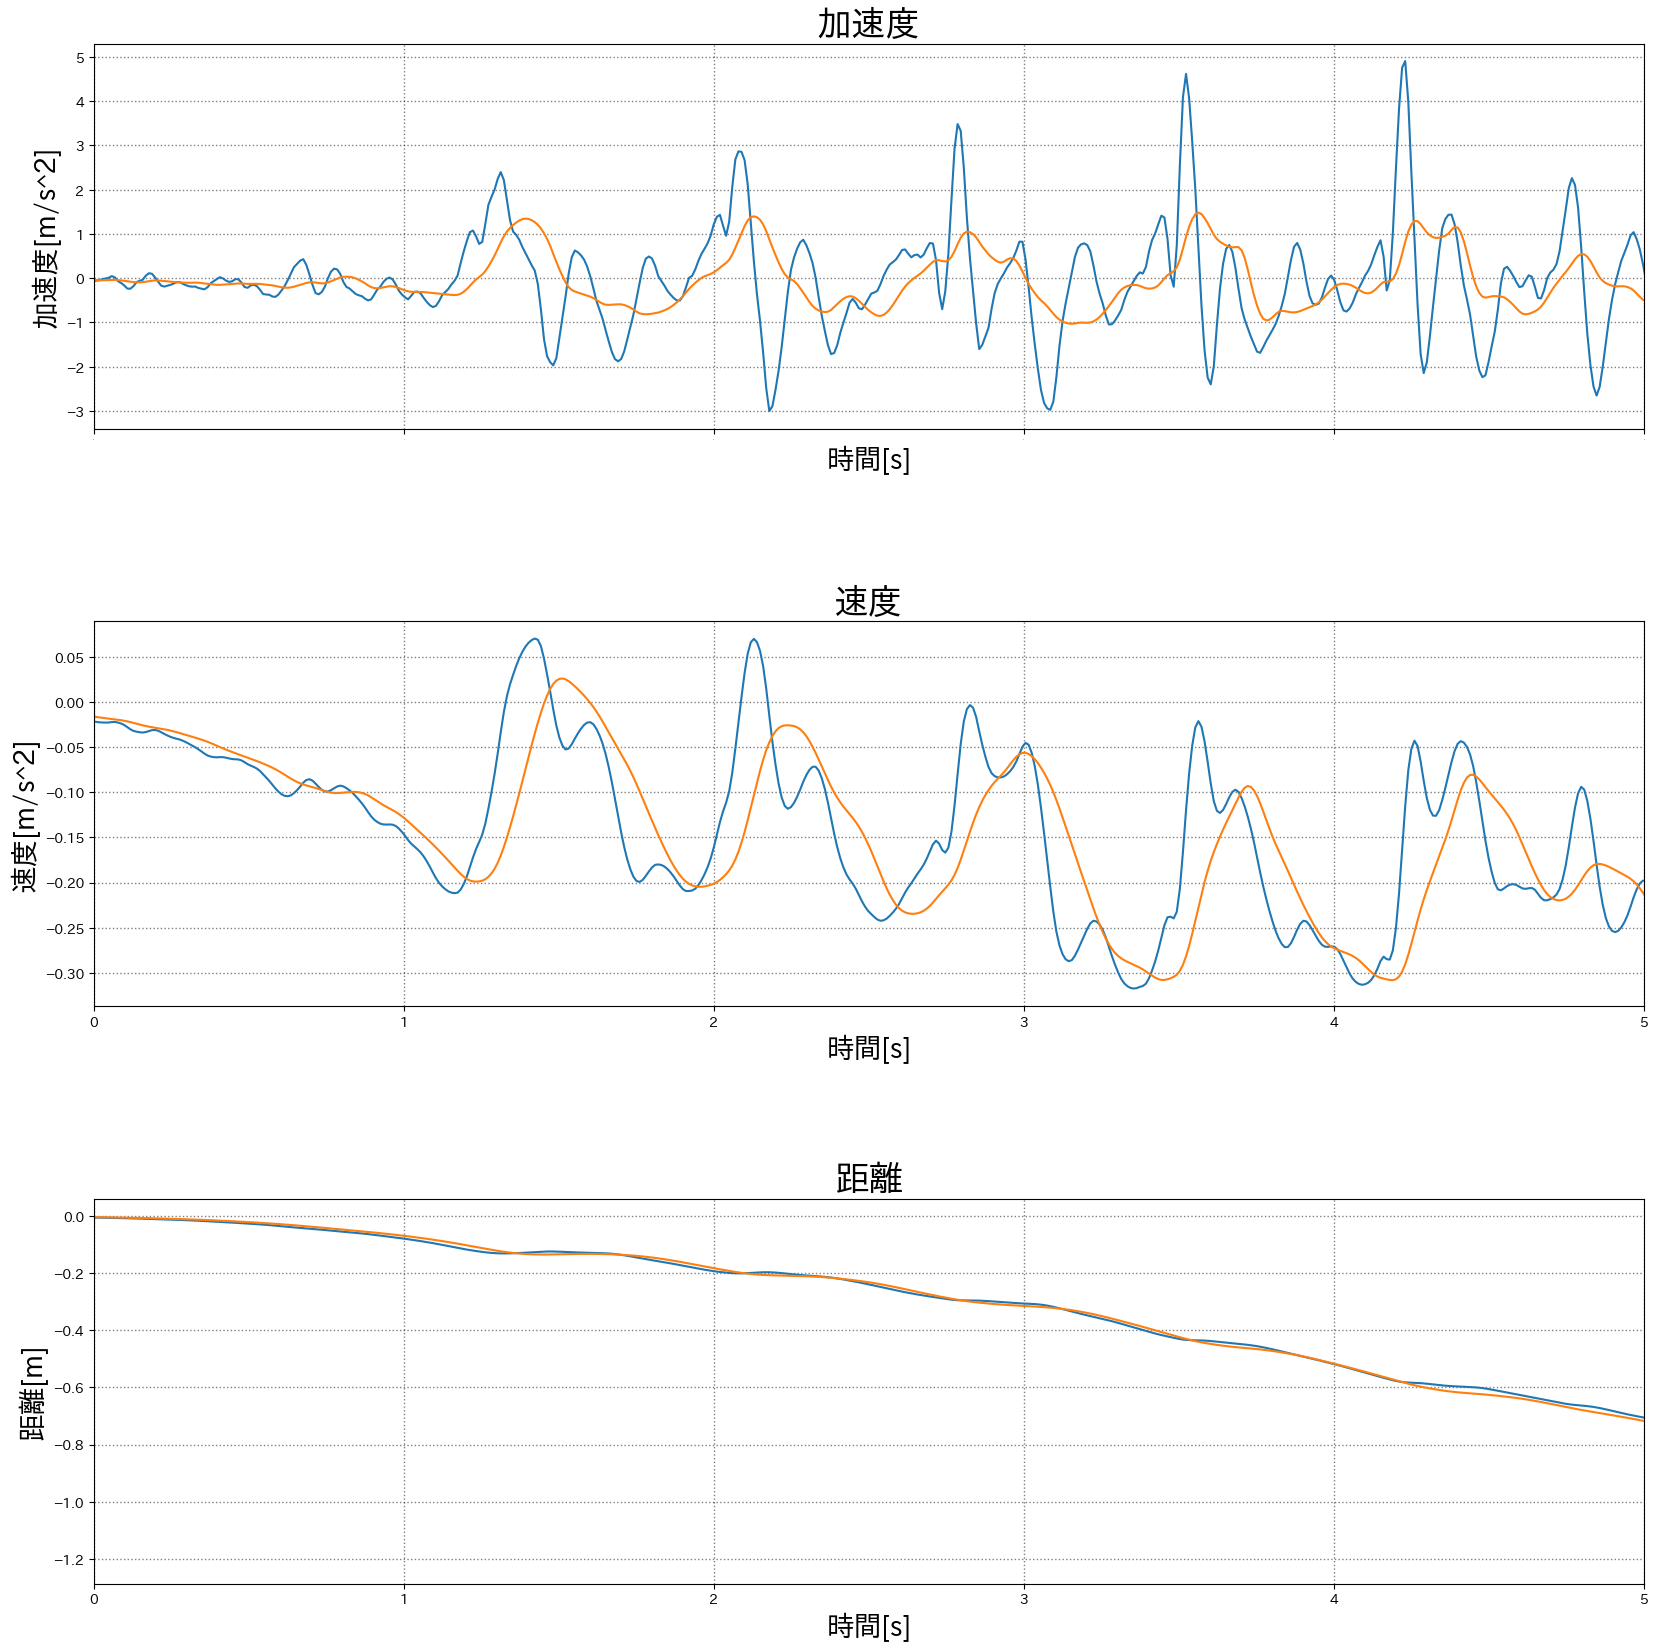

In [6]:
# グラフの描画
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(3, 1, 1)
plt.subplots_adjust(hspace=0.5)
ax1.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
ax1.set_title('加速度', fontdict={'size': fontsize_title})
ax1.set_xlabel('時間[s]', fontdict={'size': fontsize_label})
ax1.set_ylabel('加速度[m/s^2]', fontdict={'size': fontsize_label})

ax2 = fig.add_subplot(3, 1, 2)
ax2.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
ax2.set_title('速度', fontdict={'size': fontsize_title})
ax2.set_xlabel('時間[s]', fontdict={'size': fontsize_label})
ax2.set_ylabel('速度[m/s^2]', fontdict={'size': fontsize_label})

ax3 = fig.add_subplot(3, 1, 3)
ax3.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
ax3.set_title('距離', fontdict={'size': fontsize_title})
ax3.set_xlabel('時間[s]', fontdict={'size': fontsize_label})
ax3.set_ylabel('距離[m]', fontdict={'size': fontsize_label})

# データをプロット
ax1.plot(relative_time[:-window], data[:-window], label="a")
ax1.plot(relative_time[:-window], smooth_data, label="a'")
ax2.plot(relative_time[:-window], i_data[:-window], label="v")
ax2.plot(relative_time[:-window], smooth_i_data, label="v'")
ax3.plot(relative_time[:-window], i2_data[:-window], label="p")
ax3.plot(relative_time[:-window], smooth_i2_data, label="p'")

# 範囲を指定
ax1.set_xlim(*fig_range)
ax2.set_xlim(*fig_range)
ax3.set_xlim(*fig_range)

# メモリの設定
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=1)

# グラフを表示
plt.show()
